<a href="https://colab.research.google.com/github/keirkwame/axionEmu/blob/main/Open_access_of_2e5_emulator_NN_tt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.interpolate as spi
import tensorflow as tf

# setting the seed for reproducibility
with tf.device('/device:GPU:1'):
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    np.random.seed(2)
    tf.random.set_seed(4)

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
with tf.device('/device:GPU:1'):
    model_parameters = ['h', 
                        'tau_reio', 
                        'omega_b', 
                        'n_s', 
                        'ln10A_s', 
                        'omega_cdm',
                        'log10ma',
                        'omega_ax'] #,
#                        'gamma_1',
#                        'gamma_2'
#                        ]

In [ ]:
np.linspace(0,28,15)

In [3]:
with tf.device('/device:GPU:1'):
    import pickle
    collection_list = []
    for i in np.linspace(0, 59, 60): #28,15):
        #f = open('/home/anran/axionCAMB/test_data_collect_9params_5e5_mp_test_'+str(int(i))+'.pkl', 'rb')
        f = open('/home/keir/Software/axionEmu/data_collection_axion/test_data_collect_HMcode_test_NL_120k_'+str(int(i))+'.pkl', 'rb')
        collection = pickle.load(f)
        f.close()
        print(len(collection['C_phi']))
        collection_list.append(collection)
        #print(collection)

    import random
    #random.shuffle(collection_list)

1655
1640
1675
1677
1654
1667
1653
1659
1658
1647
1692
1653
1670
1634
1676
1642
1655
1650
1684
1677
1658
1661
1640
1679
1663
1675
1651
1671
1677
1676
1666
1669
1684
1657
1642
1684
1650
1666
1654
1648
1678
1665
1689
1663
1628
1676
1685
1662
1639
1706
1658
1667
1674
1669
1677
1661
1664
1681
1642
1700


In [ ]:
import pickle
for i in np.linspace(0,28,15):
    f = open('/home/anran/axionCAMB/test_data_collect_9params_5e5_mp_test_'+str(int(i)+30)+'.pkl', 'rb')
    collection = pickle.load(f)
    f.close()
    print(len(collection['C_tt']))
    collection_list.append(collection)
    
import random
random.shuffle(collection_list)

In [ ]:
#print(len(collection_list[0]['params']['omega_b']))
#print(len(collection_list))
#print(collection_list[0]['params'].keys())
#print(collection_list[0].keys())
print(collection_list[59]['matter_mg'])


In [5]:
with tf.device('/device:GPU:1'):
#import numpy as np
    parameters_list = {}
    for key in collection['params']:
        parameters_list[key] = np.array([])

    #C_list_quick = []
    C_phi_list = []
    '''PkL_list2 = []
    k_list_quick = []
    kb_list = []
    z_list2 = []
    weyl_list2 = []
    '''

    for i in range(60):
        para_quick = collection_list[i]['params']
        #C_list_quick.extend(collection_list[i]['matter_mg'])
        C_phi_list.extend(collection_list[i]['C_phi'])
        '''PkL_list.extend(collection_list3[i]['PkL'])'''
        #k_list_quick.extend(collection_list[i]['k_index'])
        #kb_list.extend(collection_list[i]['k_indexb'])
        '''z_list.extend(collection_list3[i]['z_out'])
        weyl_list.extend(collection_list3[i]['weyl'])
        '''
        for key in para_quick:
          parameters_list[key] = np.concatenate((parameters_list[key], para_quick[key]))

    ell_range = np.linspace(2,6301, 6300)

    print(parameters_list)

    spectra_= np.log10(C_phi_list) #/1. #(7.4311*10**(12)) #/(ell_range*(ell_range+1)/(2.*np.pi))
    print(spectra_.shape)
    '''C_phi_list = np.array(C_phi_list)
    print(C_phi_list.shape)
    k_list = np.array(k_list)
    print(k_list.shape)
    kb_list = np.array(kb_list)
    print(kb_list.shape)
    z_list = np.array(z_list)
    print(z_list.shape)
    PkL_list = np.array(PkL_list)
    print(PkL_list.shape)
    weyl_list = np.array(weyl_list)
    print(weyl_list.shape)
    print(parameters_list)
    spectra_ = C_list
    '''

    #Remove nan spectra
    spectra_bool = np.array(np.sum(~np.isfinite(spectra_), axis=1), dtype=bool)
    print(spectra_bool)
    spectra_ = spectra_[~spectra_bool, :]
    for key in parameters_list.keys():
        parameters_list[key] = parameters_list[key][~spectra_bool]
        print(parameters_list[key].shape)
    print(spectra_.shape)

    cut_off = 75000 #108000
    import copy
    training_parameters_ = copy.deepcopy(parameters_list)
    h_0 = training_parameters_['H_0'][:cut_off]/100
    ln10_10A_s = np.log(training_parameters_['A_s'][:cut_off]*10**10)
    ma_mass = np.array(training_parameters_['ma'][:cut_off]*10**32,dtype='float64')
    ma_mass = np.log10(ma_mass)
    training_parameters = dict()
    training_parameters['omega_b'] = training_parameters_['omega_b'][:cut_off]
    training_parameters['omega_cdm'] = training_parameters_['omega_cdm'][:cut_off]
    training_parameters['h'] = h_0
    training_parameters['tau_reio'] = training_parameters_['tau_reio'][:cut_off]
    training_parameters['n_s'] = training_parameters_['n_s'][:cut_off]
    training_parameters['ln10A_s'] = ln10_10A_s
    training_parameters['log10ma'] = ma_mass
    training_parameters['omega_ax'] = training_parameters_['omega_ax'][:cut_off]
    #del training_parameters['gamma_1']
    #del training_parameters['gamma_2']
    #training_parameters['gamma_1'] = training_parameters_['gamma_1'][:cut_off]
    #training_parameters['gamma_2'] = training_parameters_['gamma_2'][:cut_off]

    test_parameters_ = copy.deepcopy(parameters_list)
    h_0 = test_parameters_['H_0'][cut_off:]/100
    ln10_10A_s = np.log(test_parameters_['A_s'][cut_off:]*10**10)
    ma_mass = np.array(test_parameters_['ma'][cut_off:]*10**32, dtype = 'float64')
    ma_mass = np.log10(ma_mass)
    test_parameters = dict()
    test_parameters['omega_b'] = test_parameters_['omega_b'][cut_off:]
    test_parameters['omega_cdm'] = test_parameters_['omega_cdm'][cut_off:]
    test_parameters['h'] = h_0
    test_parameters['tau_reio'] = test_parameters_['tau_reio'][cut_off:]
    test_parameters['n_s'] = test_parameters_['n_s'][cut_off:]
    test_parameters['ln10A_s'] = ln10_10A_s
    test_parameters['omega_ax'] = test_parameters_['omega_ax'][cut_off:]
    test_parameters['log10ma'] = ma_mass
    #del test_parameters['gamma_1']
    #del test_parameters['gamma_2']
    #test_parameters['gamma_1'] = test_parameters_['gamma_1'][cut_off:]
    #test_parameters['gamma_2'] = test_parameters_['gamma_2'][cut_off:]

    spectra_ = spectra_[:,:] #ell_range.shape[0]]/(ell_range*(ell_range+1)/(2.*np.pi))
    #training_log_spectra = np.log10(spectra_)[:cut_off,:]
    training_log_spectra = spectra_[:cut_off, :]
    testing_spectra = spectra_[cut_off:,:]
    print('number of training spectra: ', training_log_spectra.shape)
    print('number of testing spectra: ', testing_spectra.shape)


{'omega_b': array([0.02107348, 0.02023364, 0.0216784 , ..., 0.02127444, 0.02150025,
       0.02457899]), 'omega_cdm': array([0.07923799, 0.00026824, 0.00033626, ..., 0.05930048, 0.02237348,
       0.07191642]), 'H_0': array([60.30824424, 67.44935374, 67.40660339, ..., 81.68049734,
       60.09584247, 72.73262277]), 'n_s': array([0.95402828, 1.0160033 , 0.90629839, ..., 1.01205702, 0.91164118,
       0.9614956 ]), 'A_s': array([1.69742998e-09, 8.33325278e-10, 1.27270144e-09, ...,
       9.87659064e-10, 1.14797790e-09, 7.81542346e-10]), 'tau_reio': array([0.11748081, 0.11868416, 0.10662822, ..., 0.06959708, 0.0317001 ,
       0.03698931]), 'z': array([4.45263119, 2.72322878, 3.18301111, ..., 4.90017092, 4.9282459 ,
       3.4814816 ]), 'ma': array([2.72000867e-27, 1.04093868e-24, 2.41580305e-24, ...,
       3.33231481e-26, 7.28280786e-24, 2.61659685e-27]), 'omega_ax': array([0.03091968, 0.09117594, 0.13109867, ..., 0.07049902, 0.07809035,
       0.05350721]), 'gamma_1': array([0., 0., 0.

<ipython-input-5-914a199f0aa9>:33: RuntimeWarning: invalid value encountered in log10
  spectra_= np.log10(C_phi_list) #/1. #(7.4311*10**(12)) #/(ell_range*(ell_range+1)/(2.*np.pi))


(99873, 6300)
[False False False ... False False  True]
(97292,)
(97292,)
(97292,)
(97292,)
(97292,)
(97292,)
(97292,)
(97292,)
(97292,)
(97292,)
(97292,)
(97292, 6300)
number of training spectra:  (75000, 6300)
number of testing spectra:  (22292, 6300)


In [ ]:
#Plot training points
%matplotlib inline
plt.scatter(parameters_list['omega_cdm'], parameters_list['omega_ax'])


In [ ]:
#Plot training points
%matplotlib inline
plt.scatter(np.log10(parameters_list['ma']), parameters_list['omega_ax'])


In [ ]:
#Plot CMB lensing power spectra
%matplotlib inline
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25., 45.))
#array_reorder = np.array([3, 5, 2, 1, 4, 0])
array_reorder = np.array([3, 5, 2, 1, 4, 0]) #2, -1, 3, 1, -2, 0]) #-4, 3, 0, -1, -3, 5, -2, 1, 2, 4])
for i, C_phi in enumerate(spectra_[array_reorder]):
    axes[0].plot(ell_range, C_phi, label='log(ma [eV]) = %.2f; omega_ax = %.4f; gamma1 = %.1f; gamma2 = %.2f'%(np.log10(parameters_list['ma'][array_reorder][i]), parameters_list['omega_ax'][array_reorder][i], parameters_list['gamma_1'][array_reorder][i], parameters_list['gamma_2'][array_reorder][i]))
    axes[1].plot(ell_range, C_phi/spectra_[array_reorder][-1])
    axes[2].plot(ell_range, C_phi/spectra_[array_reorder][-1])
axes[1].axhline(y=1., color='black', ls=':')
axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
#axes[0].set_yscale('log')
axes[1].set_yscale('linear')
axes[0].legend(frameon=False)
axes[2].set_xlabel('L')
axes[0].set_ylabel('C_pp')
axes[1].set_ylabel('C_pp / C_pp [m_ax = 10^-22 eV]')
axes[2].set_ylabel('C_pp / C_pp [m_ax = 10^-22 eV]')

#axes[2].set_ylim([0.97, 1.03])


In [ ]:
#Check Weyl potential files
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25., 15.))
k_camb = np.zeros((50, 257))
weyl_camb = np.zeros((50, 257))
for i in range(50):
    k_camb[i, :] = np.loadtxt('/home/keir/Software/axionEmu/data_collection_axion/test_4test_HMcode_0/test_4test_HMcode_0_0_transfer_%i.dat'%(i+1))[:, 0]
    weyl_camb[i, :] = np.loadtxt('/home/keir/Software/axionEmu/data_collection_axion/test_4test_HMcode_0/test_4test_HMcode_0_0_transfer_%i.dat'%(i+1))[:, -2]
    axes.plot(k_camb[i, :], weyl_camb[i, :], label='z = %.3f'%(z_list[:, ::-1][0, i]))
axes.legend(ncol=3)
axes.set_xscale('log')
axes.set_yscale('linear')
axes.set_xlabel('k [h/Mpc]', fontsize=20.)
axes.set_ylabel('Weyl transfer function', fontsize=20.)


In [ ]:
#Test Weyl potential
%matplotlib inline
transfer_test = np.loadtxt('/home/keir/Software/axionCAMB/test_lague_transfer_out.dat')
plt.plot(transfer_test[:, 0], transfer_test[:, -2])
plt.xscale('log')
plt.xlabel('k [h/Mpc]', fontsize=20.)
plt.ylabel('Weyl transfer function [z = 0]', fontsize=20.)


In [ ]:
print(weyl_camb)


In [ ]:
%matplotlib inline
plt.plot(ell_range, training_log_spectra[20]) #* ell_range * (ell_range + 1) / 2. / np.pi)
plt.plot(ell_range, training_log_spectra[-20]) #* ell_range * (ell_range + 1) / 2. / np.pi)


In [ ]:
#Plot non-linear matter power spectra
plt.plot(np.log10(k_list[30][:581]), np.log10(C_list[30][:581]))
plt.plot(np.log10(k_list[-30][:581]), np.log10(C_list[-30][:581]))


In [ ]:
#Plot non-linear matter power spectra using quicker code
plt.plot(np.log10(k_list_quick[30]), np.log10(C_list_quick[30]))
plt.plot(np.log10(k_list_quick[-30]), np.log10(C_list_quick[-30]))
print(k_list_quick[30].shape)
print(k_list_quick[-30].shape)


In [ ]:
#Plot non-linear matter power spectra using quicker code
for idx in range(60):
    plt.plot(np.log10(k_list_quick[idx]), np.absolute(C_list_quick[idx] / C_list[idx][:C_list_quick[idx].shape[0]] - 1.))
#plt.plot(np.log10(k_list_quick[idx2]), C_list_quick[idx2] / C_list[idx2][:C_list_quick[idx2].shape[0]])
print(k_list_quick[idx1].shape)
plt.yscale('log')
plt.axvline(x=1.)
plt.axhline(y=0.01)


In [ ]:
print(k_list_quick[idx] / k_list[idx][:k_list_quick[idx].shape[0]])


In [ ]:
%matplotlib inline
plt.plot(ell_range, (10. ** training_log_spectra[0]) * ell_range * (ell_range + 1) / 2. / np.pi)
plt.plot(ell_range, (10. ** training_log_spectra[-1]) * ell_range * (ell_range + 1) / 2. / np.pi)


In [ ]:
%matplotlib inline
plt.plot(ell_range, 10. ** training_log_spectra[0])
plt.plot(ell_range, (10. ** training_log_spectra[1]) * 1.)
plt.yscale('log')


In [ ]:
print(z_list)


In [ ]:
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25., 30.))
for i in np.array([3, 0, 2, 1]):
    print(C_phi_list[i][:5999] * 1.e+7)
    axes[0].plot(ell_range, C_phi_list[i][:5999] * 1.e+7, label=r'log(ma) = %.3f; 0.1 DM'%np.log10(parameters_list['ma'][i]))
    axes[1].plot(ell_range, C_phi_list[i][:5999] / C_phi_list[3][:5999])
#plt.plot(ell_range, C_phi_list[1][:5999] * 1.e+7)
axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[0].set_yscale('log')
axes[0].legend(frameon=False, fontsize=20.)
axes[1].set_xlabel('L', fontsize=20.)
axes[0].set_ylabel('10^7 C^{kk}', fontsize=20.)
axes[1].set_ylabel('C^{kk} / C^{kk}_{LCDM}', fontsize=20.)


In [ ]:
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(25., 60.))
for i in np.array([3, 7, 6, 4, 5, 8]):
    PkNL_interpolated = spi.interp1d(np.log10(k_list[i][:]), np.log10(C_list[i][0, :]))
    if i > 3:
        label_i = r'log(ma) = %.3f; 0.1 DM'%np.log10(parameters_list['ma'][i])
    else:
        label_i = r'LCDM'
    axes[0].plot(k_list[i][:], C_list[i][0, :], label=label_i) #k_list[0, :],
    axes[1].plot(k_list[i][:], PkL_list[i][0, :])
    axes[2].plot(k_list[i][:], C_list[i][0, :] / PkL_list[i][0, :])
    axes[3].plot(k_list[3][:-10], (10. ** PkNL_interpolated(np.log10(k_list[3][:-10]))) / C_list[3][0, :-10])
#plt.plot(k_list[0, :], training_log_spectra[1]) #k_list[0, :],

axes[2].axhline(y=1., color='black', ls=':')

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[2].set_xscale('log')
axes[3].set_xscale('log')

axes[3].set_xlabel('k [h / Mpc]', fontsize=20.)
axes[0].set_ylabel('P_NL(k) [(Mpc / h)**3]', fontsize=20.)
axes[1].set_ylabel('P_L(k) [(Mpc / h)**3]', fontsize=20.)
axes[2].set_ylabel('P_NL(k) / P_L(k)', fontsize=20.)
axes[3].set_ylabel('P_NL(k) / P_NL(k; LCDM)', fontsize=20.)
axes[0].legend(ncol=1, fontsize=20.)

axes[2].set_ylim([0.75, 1.25])


In [ ]:
#Plot power spectra going into lensing calculation

%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(25., 60.))
for i in np.array([2, 1, 4, 3, 7, 6, 0, 5]):
    PkNL_interpolated = spi.interp1d(np.log10(k_list[i][:]), np.log10(C_list[i][0, :]))
    axes[0].plot(k_list[i][:], C_list[i][0, :], label=r'log(ma) = %.3f; 0.1 DM'%np.log10(parameters_list['ma'][i])) #k_list[0, :],
    axes[1].plot(k_list[i][:], PkL_list[i][0, :])
    axes[2].plot(k_list[i][:], C_list[i][0, :] / PkL_list[i][0, :])
    axes[3].plot(k_list[2][:-10], (10. ** PkNL_interpolated(np.log10(k_list[2][:-10]))) / C_list[2][0, :-10])
#plt.plot(k_list[0, :], training_log_spectra[1]) #k_list[0, :],

axes[2].axhline(y=1., color='black', ls=':')

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[2].set_xscale('log')
axes[3].set_xscale('log')

axes[3].set_xlabel('k [h / Mpc]', fontsize=20.)
axes[0].set_ylabel('P_NL(k) [(Mpc / h)**3]', fontsize=20.)
axes[1].set_ylabel('P_L(k) [(Mpc / h)**3]', fontsize=20.)
axes[2].set_ylabel('P_NL(k) / P_L(k)', fontsize=20.)
axes[3].set_ylabel('P_NL(k) / P_NL(k; m=-22)', fontsize=20.)
axes[0].legend(ncol=1, fontsize=20.)


In [ ]:
print(z_list)


In [ ]:
print(k_list[0], k_list[1], len(k_list[0]), len(k_list[1]))


In [ ]:
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25., 15.))
for i, z in enumerate(z_list[0]):
    axes.plot(k_list[0, :], weyl_list[0, i, :], label='z = %.3f'%z) #k_list[0, :],
    #axes[1].plot(k_list[0, :], PkL_list[0, i, :])
    #axes[2].plot(k_list[0, :], training_log_spectra[0, i, :] / PkL_list[0, i, :])
#plt.plot(k_list[0, :], training_log_spectra[1]) #k_list[0, :],

#axes[2].axhline(y=1., color='black', ls=':')

axes.set_xscale('log')
axes.set_yscale('log')
#axes[1].set_xscale('log')
#axes[1].set_yscale('log')
#axes[2].set_xscale('log')

axes.set_xlabel('k [h / Mpc]', fontsize=20.)
axes.set_ylabel('P_Weyl(k) [(Mpc / h)**3]', fontsize=20.)
#axes[1].set_ylabel('P_L(k) [(Mpc / h)**3]', fontsize=20.)
#axes[2].set_ylabel('P_NL(k) / P_L(k)', fontsize=20.)
axes.legend(ncol=3)


In [ ]:
print(weyl_list[0, 0, :])


In [ ]:
%matplotlib inline
plt.plot(k_list[0, :], training_log_spectra[0]) #k_list[0, :], 
plt.plot(k_list[0, :], training_log_spectra[1]) #k_list[0, :],
plt.xscale('log')
plt.yscale('log')


In [ ]:
print(k_list)
print(kb_list / 0.6732)


In [7]:
with tf.device('/device:GPU:1'):
    test_collection = {}
    test_collection['training_parameters'] = training_parameters
    test_collection['test_parameters'] = test_parameters
    test_collection['training_log_spectra'] = training_log_spectra
    test_collection['testing_spectra'] = testing_spectra
    import pickle
    f = open('test_collection_C_pp_120k.pkl', 'wb')
    pickle.dump(test_collection, f)
    f.close()

In [ ]:
##Only for Google Colab
!git clone https://github.com/keirkwame/axionEmu.git

In [6]:
# instantiate NN class
with tf.device('/device:GPU:1'): # ensures we are running on a GPU
    from axionEmu.cosmopower import cosmopower_NN
    cp_nn = cosmopower_NN(parameters=model_parameters, 
                      modes=ell_range, 
                      n_hidden = [512, 512, 512,512], # 4 hidden layers, each with 512 nodes
                      verbose=True, # useful to understand the different steps in initialisation and training
                      )



Initialized cosmopower_NN model, 
mapping 8 input parameters to 6300 output modes, 
using 4 hidden layers, 
with [512, 512, 512, 512] nodes, respectively. 



In [8]:
#import tensorflow as tf
with tf.device('/device:GPU:1'): # ensures we are running on a GPU
    # train
    cp_nn.train(training_parameters=training_parameters,
                training_features=training_log_spectra,
                filename_saved_model='pp_lensing_NL_120k_NN_axion',
                # cooling schedule
                validation_split=0.1,
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024,1024,1024,1024,1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100],
                max_epochs = [1000,1000,1000,1000,1000],
                )


Starting cosmopower_NN training, 
using 10 per cent of training samples for validation. 
Performing 5 learning steps, with 
[0.01, 0.001, 0.0001, 1e-05, 1e-06] learning rates 
[1024, 1024, 1024, 1024, 1024] batch sizes 
[1, 1, 1, 1, 1] gradient accumulation steps 
[100, 100, 100, 100, 100] patience values 
[1000, 1000, 1000, 1000, 1000] max epochs 

learning rate = 0.01, batch size = 1024


 46%|████▌     | 455/1000 [1:25:09<1:41:59, 11.23s/it, loss=0.00689]


Validation loss = 0.005176175
Model saved.
Reached max number of epochs. Validation loss = 0.005176175
Model saved.
learning rate = 0.001, batch size = 1024


 10%|█         | 105/1000 [20:01<2:50:38, 11.44s/it, loss=0.0285] 


Validation loss = 0.0036040791
Model saved.
Reached max number of epochs. Validation loss = 0.0036040791
Model saved.
learning rate = 0.0001, batch size = 1024


 47%|████▋     | 468/1000 [1:46:06<2:00:37, 13.60s/it, loss=0.00201]


Validation loss = 0.0019764982
Model saved.
Reached max number of epochs. Validation loss = 0.0019764982
Model saved.
learning rate = 1e-05, batch size = 1024


 10%|█         | 100/1000 [24:43<3:42:30, 14.83s/it, loss=0.00176]


Validation loss = 0.0017102537
Model saved.
Reached max number of epochs. Validation loss = 0.0017102537
Model saved.
learning rate = 1e-06, batch size = 1024


 10%|█         | 100/1000 [24:07<3:37:04, 14.47s/it, loss=0.0124]


Validation loss = 0.012350755
Model saved.
Reached max number of epochs. Validation loss = 0.012350755
Model saved.


In [ ]:
with tf.device('/device:GPU:1'): # ensures we are running on a GPU:
    cp_nn = cosmopower_NN(restore=True, 
                          restore_filename='TT_lensed_NL_NN_axion',
                          )


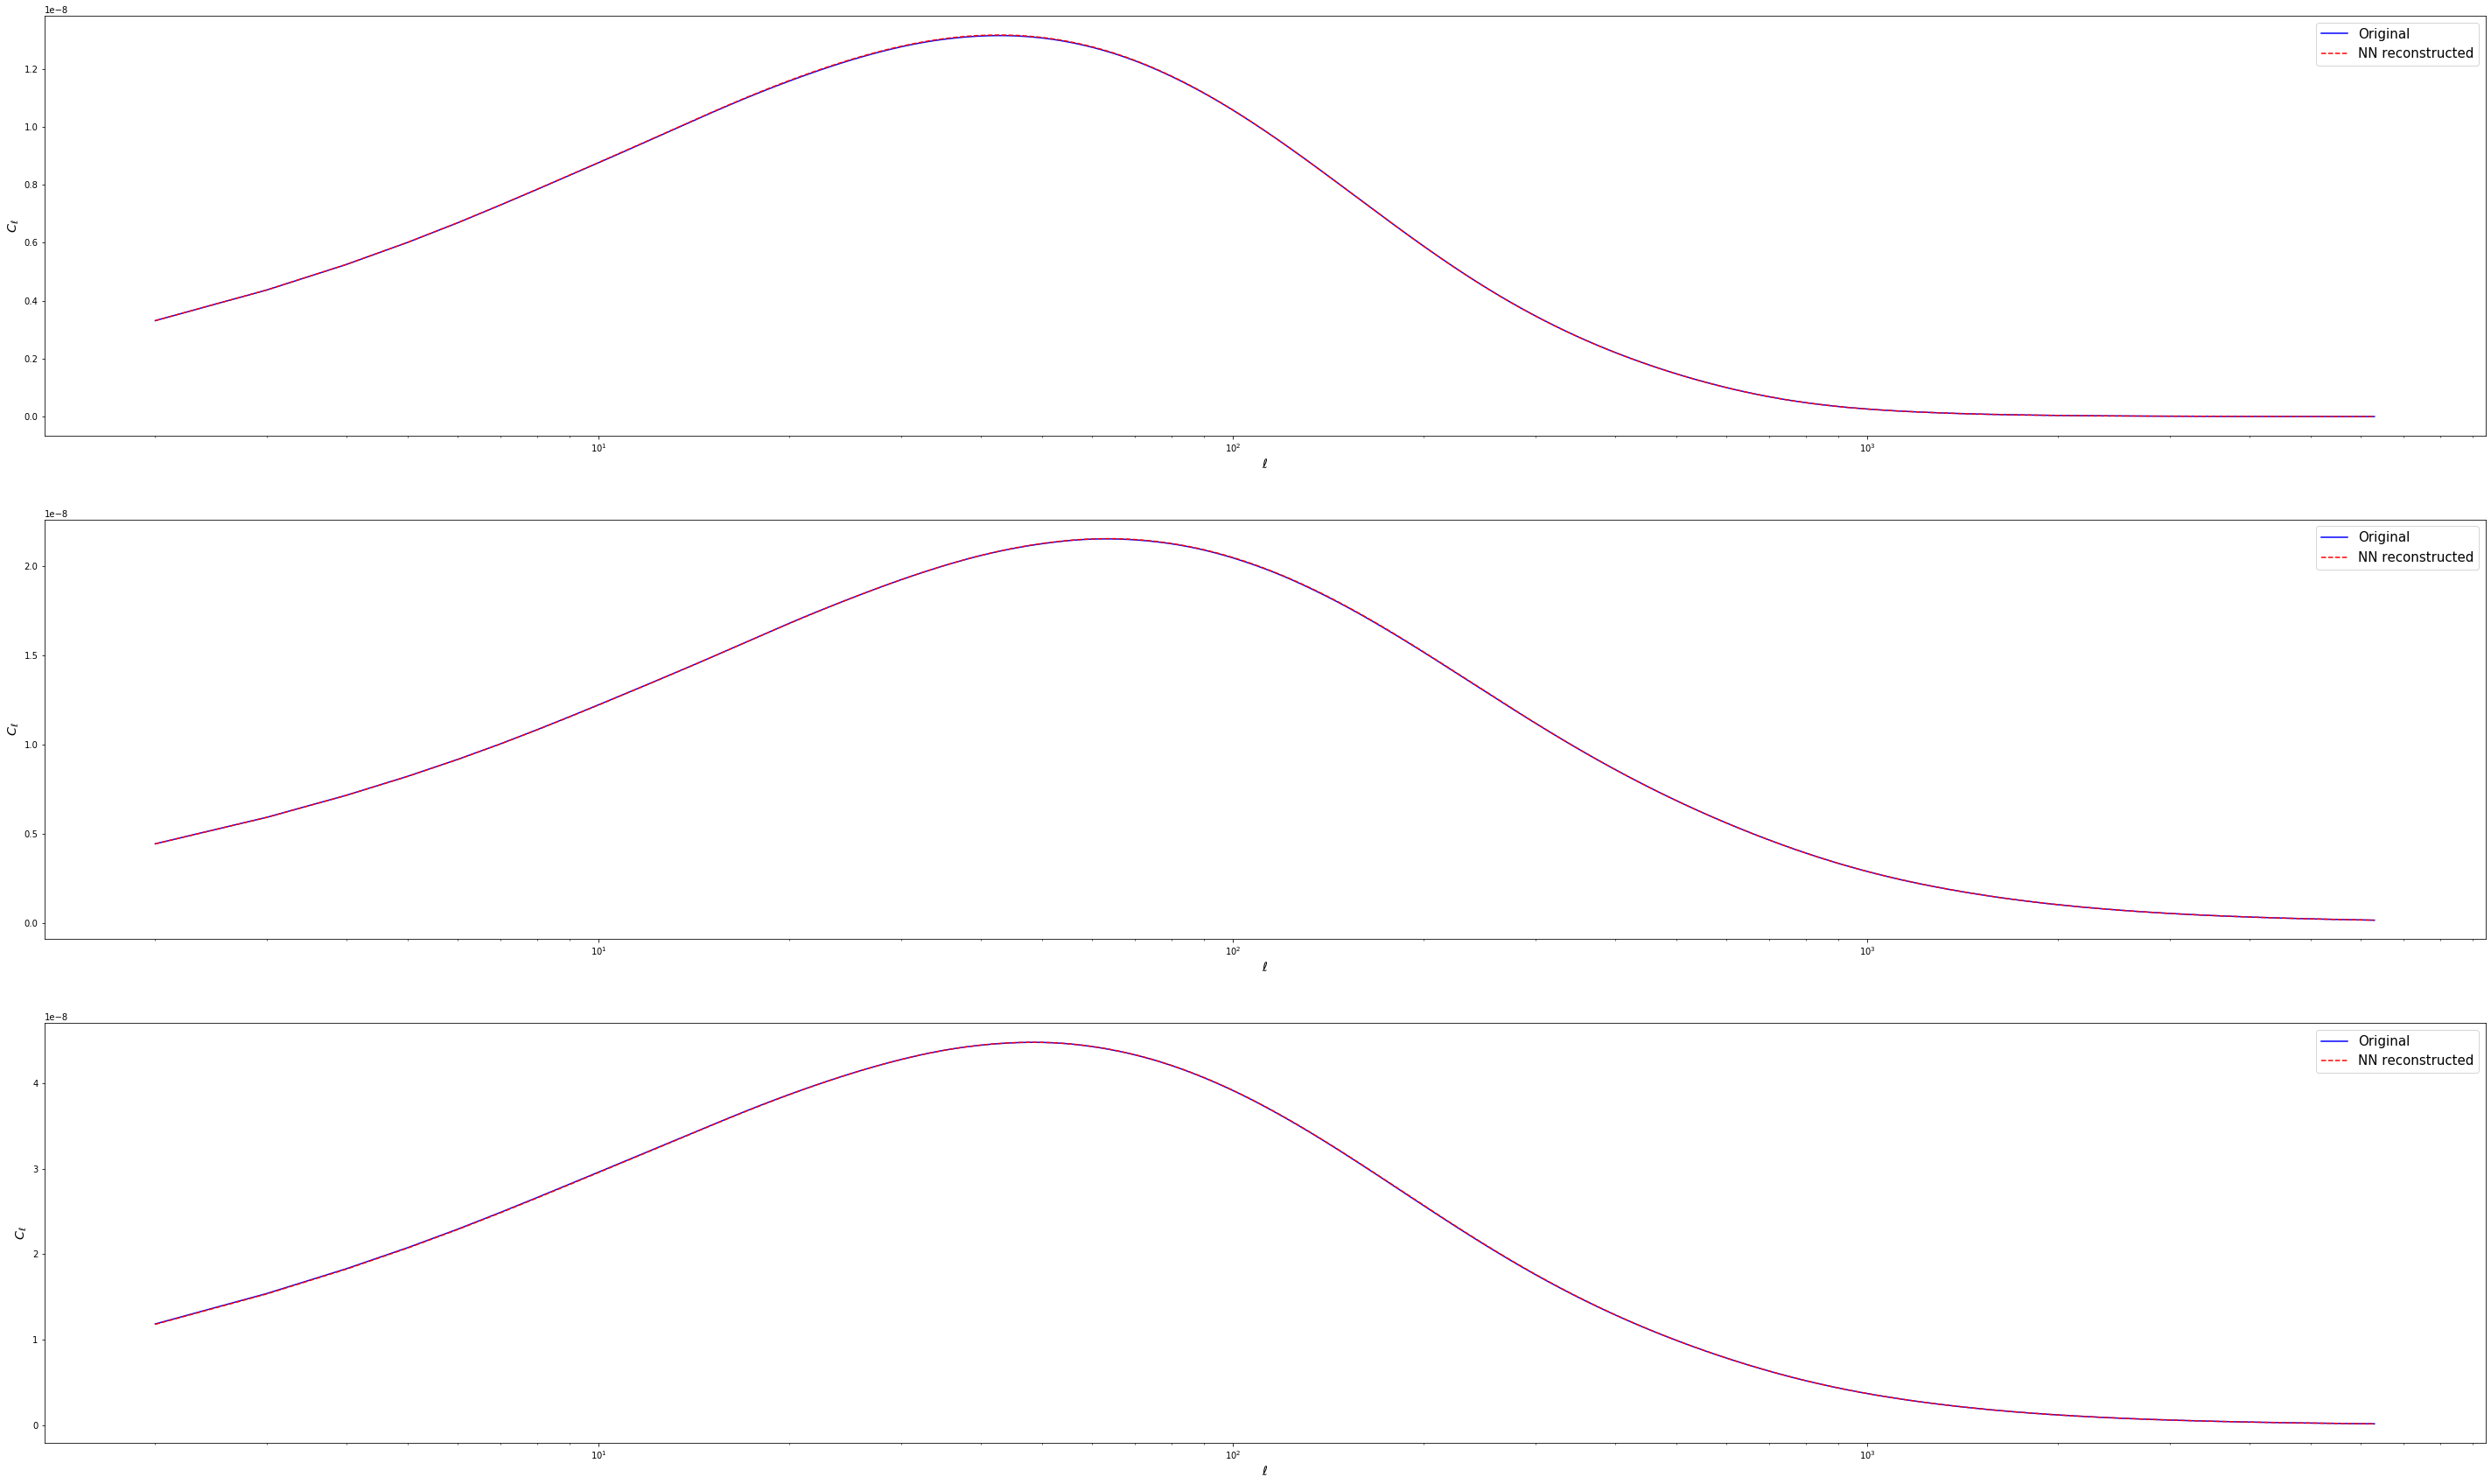

In [9]:
with tf.device('/device:GPU:1'): # ensures we are running on a GPU:
    predicted_testing_spectra = cp_nn.ten_to_predictions_np(test_parameters)
    import matplotlib.pyplot as plt
    from matplotlib import gridspec
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(50,30))
    for i in range(3):
        pred = predicted_testing_spectra[i] #*ell_range*(ell_range+1)/(2.*np.pi)
        true = 10. ** testing_spectra[i] #*ell_range*(ell_range+1)/(2.*np.pi)
        ax[i].semilogx(ell_range, true, 'blue', label = 'Original')
        ax[i].semilogx(ell_range, pred, 'red', label = 'NN reconstructed', linestyle='--')
        ax[i].set_xlabel('$\ell$', fontsize='x-large')
        ax[i].set_ylabel('$C_\ell$', fontsize='x-large')
        ax[i].legend(fontsize=15)
    plt.savefig('examples_reconstruction_pp_lensing_axion_120k.pdf')


In [ ]:
print(np.sum(np.isnan(spectra_)) / np.size(spectra_))
print(parameters_list.keys())
for i in range(10000): #spectra_.shape[0]):
    if np.sum(np.isnan(spectra_[i])):
        plt.scatter(np.log10(parameters_list['ma'][i]), parameters_list['omega_ax'][i])


In [ ]:
print(np.sum(np.isnan(spectra_)) / np.size(spectra_))
print(parameters_list.keys())
plt.xlabel('log10ma')
plt.ylabel('omega-ax')
for i in range(1000): #spectra_.shape[0]):
    if not np.sum(np.isnan(spectra_[i])):
        plt.scatter(np.log10(parameters_list['ma'][i]), parameters_list['omega_ax'][i])


In [ ]:
#Remove nan spectra
spectra_bool = np.array(np.sum(np.isnan(spectra_), axis=1), dtype=bool)
print(spectra_bool)
print(np.sum(spectra_bool) / spectra_bool.size)
print(spectra_[0])
print(spectra_[1])


In [ ]:
##Only for Google Colab
!git clone https://github.com/simonsobs/so_noise_models

diff_.shape is  (22292,)


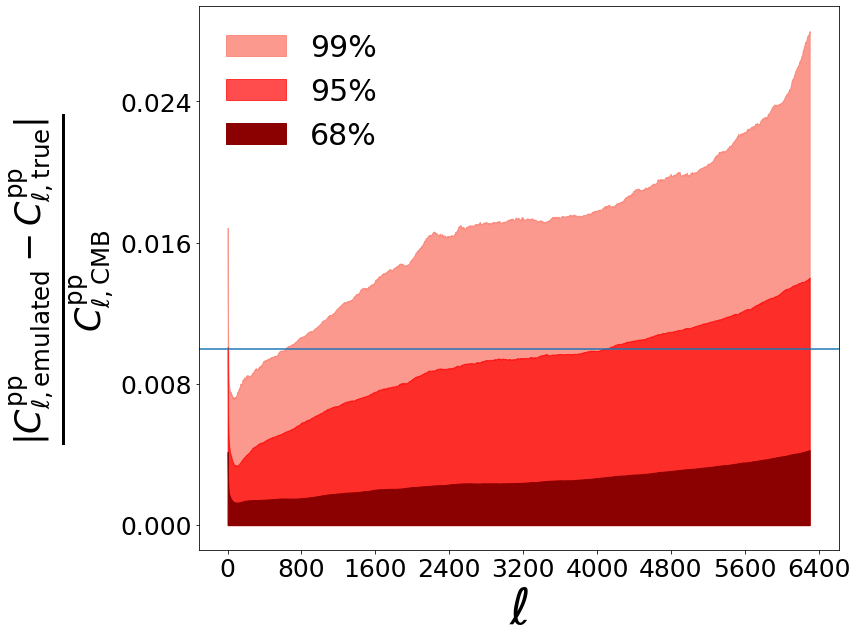

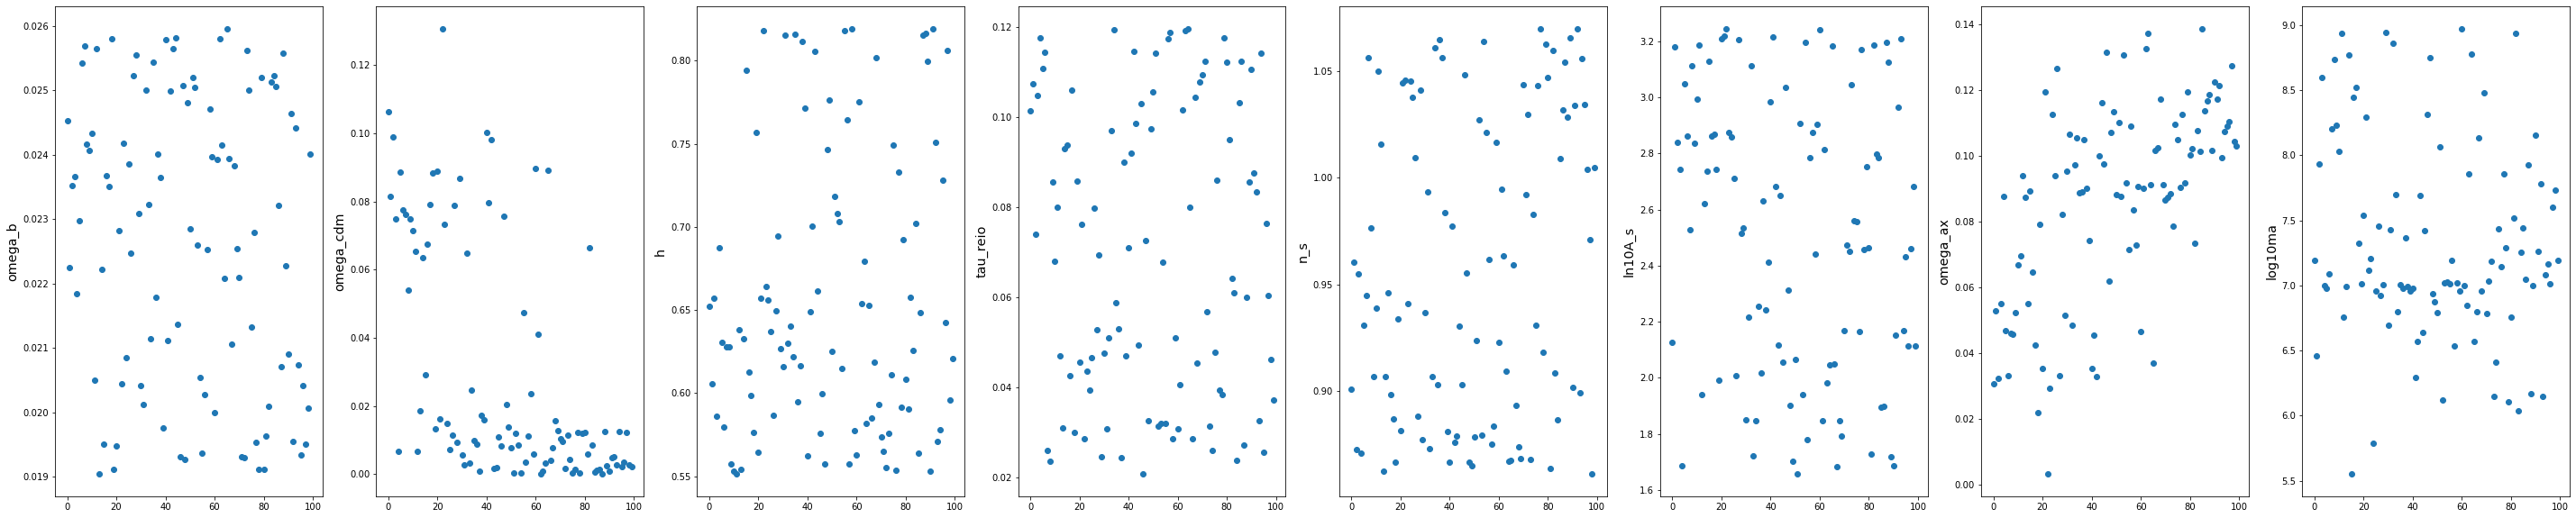

In [10]:
with tf.device('/device:GPU:1'): # ensures we are running on a GPU:
    # load noise models from the SO noise repo
    '''noise_levels_load = np.loadtxt('./so_noise_models/LAT_comp_sep_noise/v3.1.0/SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt')
    conv_factor = (2.7255e6)**2

    ells = noise_levels_load[:, 0]
    SO_TT_noise = noise_levels_load[:, 1][:np.max(ell_range)+1-40] / conv_factor ##6001-40
    new_ells = ells[:np.max(ell_range)+1-40] ##6001-40

    f_sky = 0.4'''
    prefac = 1. #np.sqrt(2/(f_sky*(2*new_ells+1)))

    ##Cut off some spectra
    #print(new_ells)
    #print(prefac.shape, testing_spectra.shape, SO_TT_noise.shape)
    #testing_spectra = testing_spectra[:6001-40]

    denominator = prefac*(10. ** testing_spectra[:, :])  # use all of them #+SO_TT_noise #38:
    diff = np.abs((predicted_testing_spectra[:, :] - (10. ** testing_spectra[:, :]))/(denominator))

    # Compute percentiles
    percentiles = np.zeros((4, diff.shape[1]))

    percentiles[0] = np.percentile(diff, 68, axis = 0)
    percentiles[1] = np.percentile(diff, 95, axis = 0)
    percentiles[2] = np.percentile(diff, 99, axis = 0)
    percentiles[3] = np.percentile(diff, 99.9, axis = 0)

    plt.figure(figsize=(12, 9))
    plt.fill_between(ell_range, 0, percentiles[2,:], color = 'salmon', label = '99%', alpha=0.8)
    plt.fill_between(ell_range, 0, percentiles[1,:], color = 'red', label = '95%', alpha = 0.7)
    plt.fill_between(ell_range, 0, percentiles[0,:], color = 'darkred', label = '68%', alpha = 1)

    # plt.ylim(0, 0.2)

    plt.legend(frameon=False, fontsize=30, loc='upper left')
    plt.ylabel(r'$\frac{| C_{\ell, \rm{emulated}}^{\rm{pp}} - C_{\ell, \rm{true}}^{\rm{pp}}|} {C_{\ell, \rm{CMB}}^{\rm{pp}}}$', fontsize=50)
    plt.xlabel(r'$\ell$',  fontsize=50)

    plt.axhline(y=0.01)
    #plt.axvline(x=np.log10(40))
    #plt.xscale('log')

    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    plt.setp(ax.get_xticklabels(), fontsize=25)
    plt.setp(ax.get_yticklabels(), fontsize=25)
    plt.tight_layout()
    plt.savefig('./accuracy_emu_pp_lensing_axion_120k.pdf')

    diff_=np.sum(diff,axis = 1)
    print('diff_.shape is ', diff_.shape)
    sort_index = np.argsort(diff_)
    bad_params = dict()
    for key in test_parameters:
        bad_params[key] = []
    for i in sort_index[len(sort_index)-100:]:
        for key in test_parameters:
            bad_params[key].append(test_parameters[key][i])
    fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(50,10))
    for i in range(8):
        pa =list(test_parameters.keys())[i]
        h = bad_params[pa]
        ax[i].plot(h, 'o')
        ax[i].set_ylabel(pa, fontsize='x-large')
    plt.savefig('bad_params_pp_lensing_axion_120k.pdf')
